In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
df = pd.concat([train,test])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Loan_Status,367,0.374108
Credit_History,79,0.080530
Self_Employed,55,0.056065
LoanAmount,27,0.027523
Dependents,25,0.025484
Gender,24,0.024465
Loan_Amount_Term,20,0.020387
Married,3,0.003058
Loan_ID,0,0.000000
Education,0,0.000000


In [11]:
df['Gender'] = df['Gender'].fillna(
df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna(
df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna(
df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna(
df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna(
df['LoanAmount'].dropna().median() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(
df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna(
df['Credit_History'].dropna().mode().values[0] )
df['Loan_Status'] = df['Loan_Status'].fillna(
df['Loan_Status'].dropna().mode().values[0] )

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


<Axes: xlabel='Dependents', ylabel='count'>

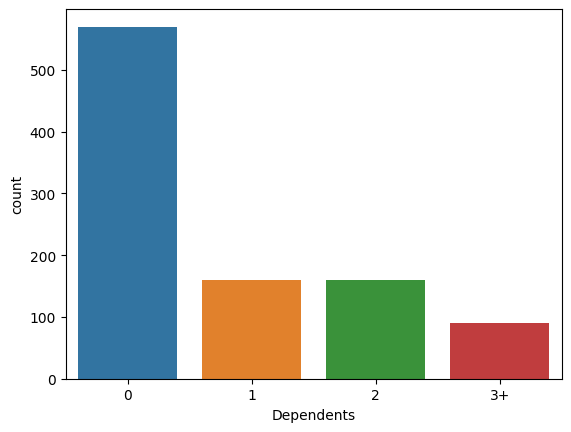

In [13]:
sns.countplot(x='Dependents',data=df)

<Axes: xlabel='count', ylabel='Credit_History'>

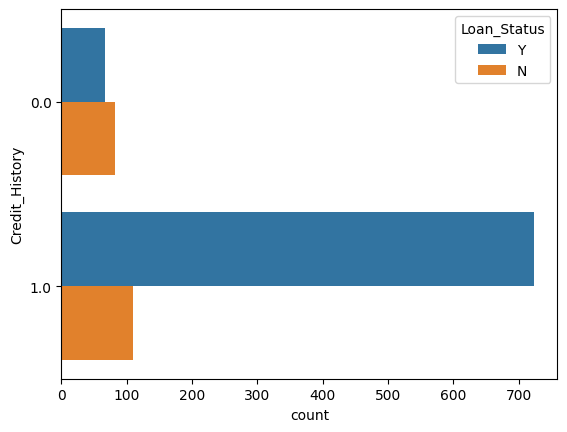

In [14]:
sns.countplot(y = "Credit_History" , hue = "Loan_Status",data = df)

<Axes: xlabel='count', ylabel='Loan_Amount_Term'>

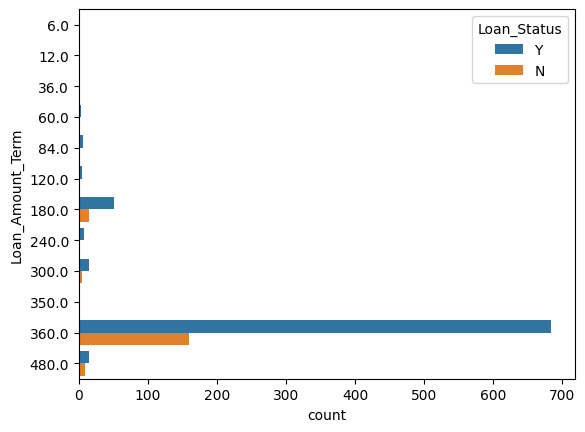

In [15]:
sns.countplot(y = "Loan_Amount_Term" , hue = "Loan_Status",data = df)

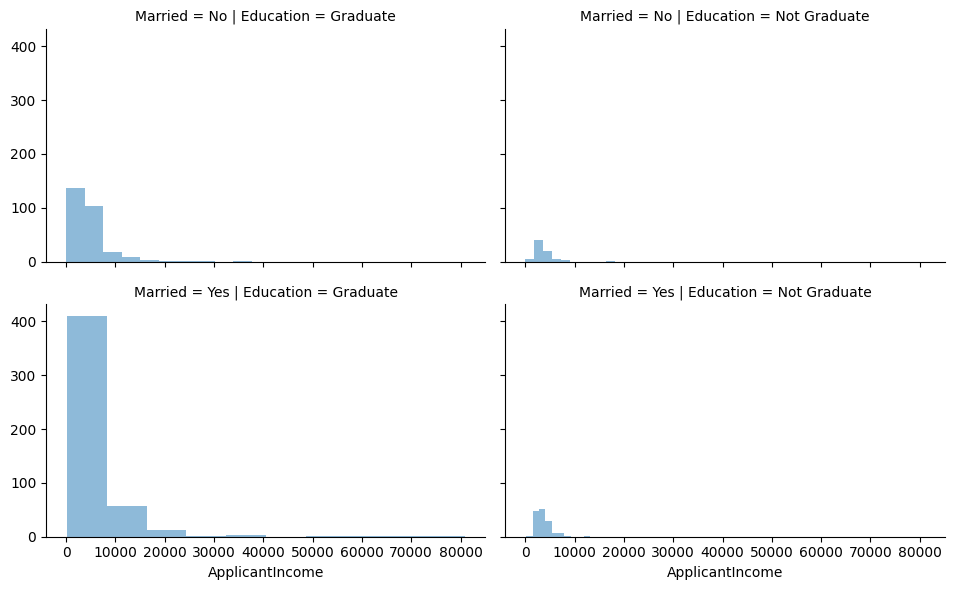

In [16]:
grid = sns.FacetGrid(df , row = 'Married', col = 'Education', aspect = 1.6)
grid.map(plt.hist , 'ApplicantIncome', alpha =.5, bins=10)
grid.add_legend()

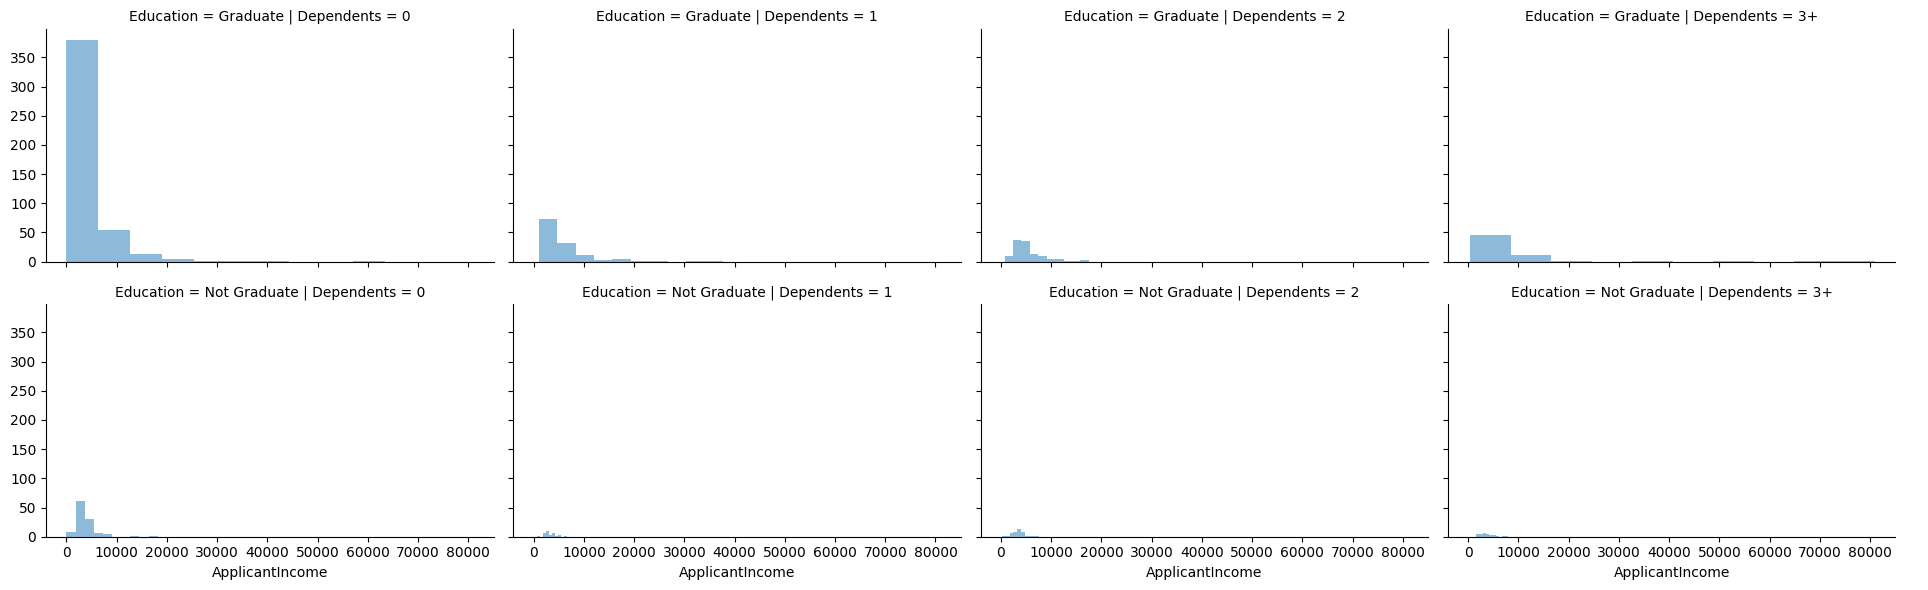

In [17]:
grid = sns.FacetGrid(df , row = 'Education', col = 'Dependents', aspect = 1.6)
grid.map(plt.hist , 'ApplicantIncome', alpha =.5, bins=10)
grid.add_legend()

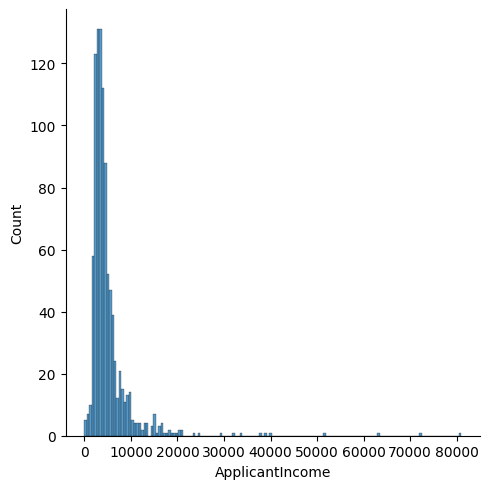

In [18]:
sns.displot(df['ApplicantIncome'])

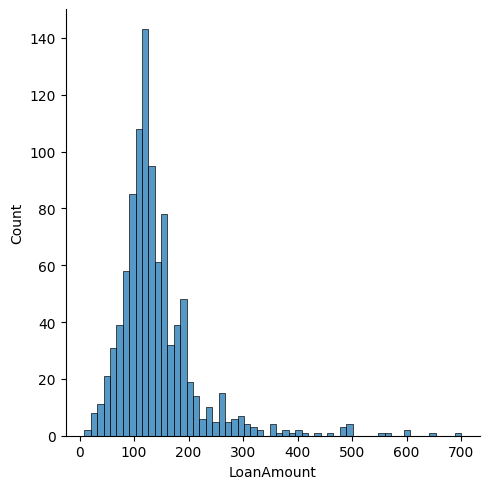

In [19]:
sns.displot(df['LoanAmount'])

<Axes: xlabel='count', ylabel='Gender'>

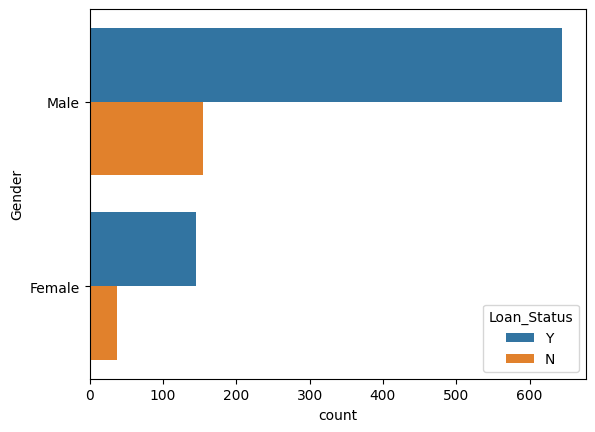

In [20]:
sns.countplot(y = 'Gender' , hue = 'Loan_Status',data = df)

<Axes: >

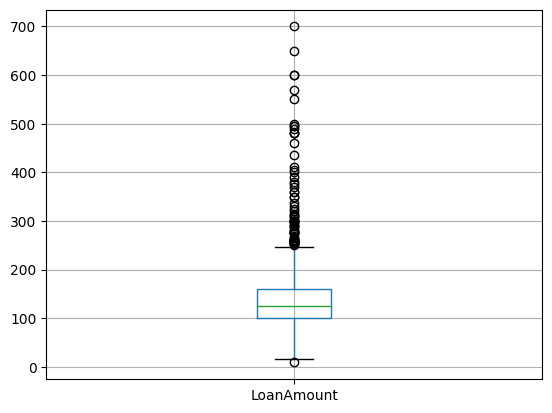

In [21]:
df.boxplot(column='LoanAmount')

C:\Users\sharm\AppData\Local\Temp\ipykernel_23344\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

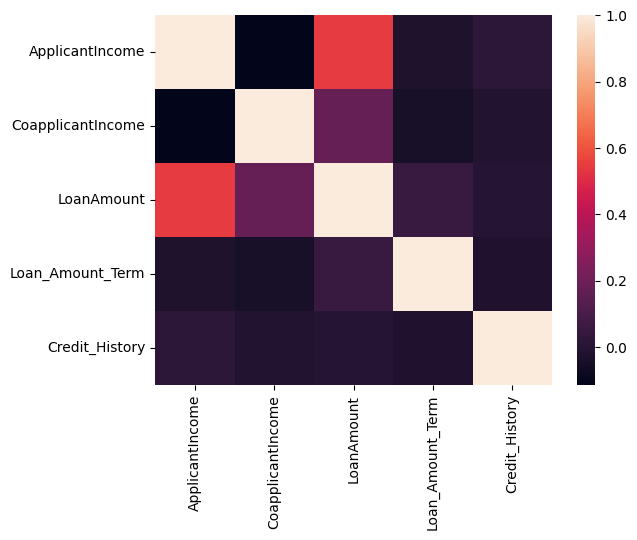

In [22]:
sns.heatmap(df.corr())

<Axes: xlabel='Credit_History', ylabel='count'>

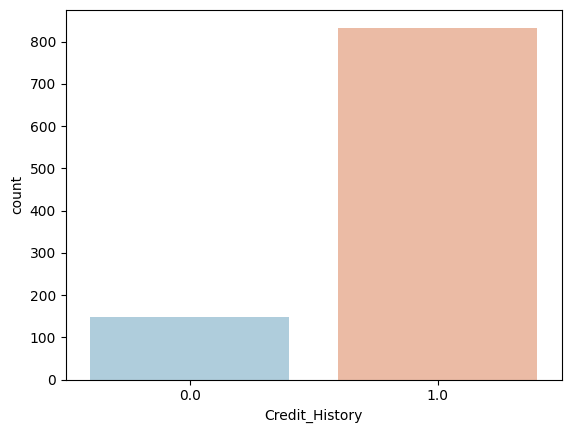

In [23]:
sns.countplot(x='Credit_History',data=df,palette='RdBu_r')

In [24]:
cat_cols = ['Gender', 'Property_Area','Education', 'Married', 'Self_Employed','Loan_Status']

In [25]:
for cols in cat_cols:
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols])

In [26]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3+,1,1,4009,1777.0,113.0,360.0,1.0,2,1
363,LP002975,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2,1
364,LP002980,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1,1
365,LP002986,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0,1


In [27]:
df = df.drop("Loan_ID", axis = 1)

In [28]:
code_numeric = {'3+': 3}

In [29]:
df = df.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [30]:
y = df["Loan_Status"]

In [31]:
X = df.drop("Loan_Status", axis = 1)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
X = scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
pred = knn.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [40]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 16  43]
 [ 26 239]]
              precision    recall  f1-score   support

           0       0.38      0.27      0.32        59
           1       0.85      0.90      0.87       265

    accuracy                           0.79       324
   macro avg       0.61      0.59      0.60       324
weighted avg       0.76      0.79      0.77       324



In [41]:
accuracy_score(y_test, pred)

0.7870370370370371

In [42]:
recall_score(y_test, pred)

0.9018867924528302

In [43]:
precision_score(y_test, pred)

0.8475177304964538

In [44]:
f1_score(y_test, pred)

0.8738574040219378

In [45]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

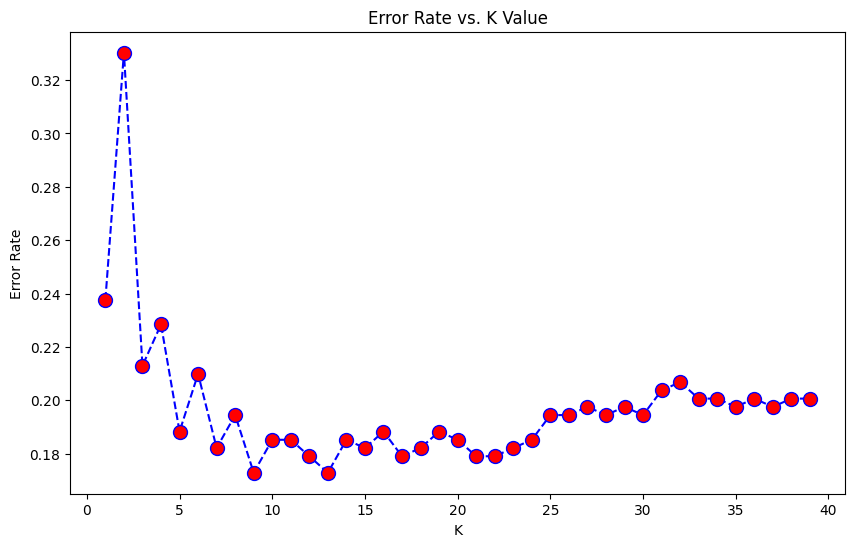

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [48]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 20  39]
 [ 19 246]]
              precision    recall  f1-score   support

           0       0.51      0.34      0.41        59
           1       0.86      0.93      0.89       265

    accuracy                           0.82       324
   macro avg       0.69      0.63      0.65       324
weighted avg       0.80      0.82      0.81       324



In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.8209876543209876


In [50]:
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [51]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [52]:
x=df[[ 'Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','Property_Area','Loan_Amount_Term','Credit_History']]
y=df['LoanAmount']

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(x.values,y.values,test_size=0.3,random_state=101)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [56]:
pred1=lm.predict(X_test)

In [57]:
print(lm.intercept_)

47.340163612119554


In [58]:
coeff=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff

,Coefficient
Dependents,5.440811
Self_Employed,16.955682
ApplicantIncome,0.007393
CoapplicantIncome,0.009911
Property_Area,-1.727936
Loan_Amount_Term,0.126524
Credit_History,-5.468402


In [59]:
from sklearn.metrics import max_error,explained_variance_score,mean_absolute_error
print(max_error(Y_test,pred1))
print(explained_variance_score(Y_test,pred1))
print(mean_absolute_error(Y_test,pred1))

342.90609856111934
0.3861679096802936
37.573785686437105


In [60]:
dfx = pd.DataFrame({

   'Original': Y_test,

   'Predicted': pred1

   })

In [61]:
lm.predict([[2,1,4000,3000,0,360,1.0]])

array([174.56364027])